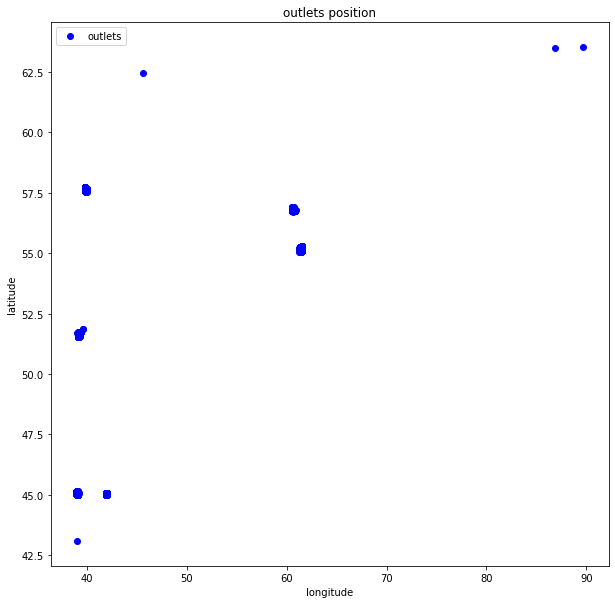

In [150]:
import pandas as pd

# считываем csv файл
coordinate = pd.read_csv("1GeoData.csv", sep=";", encoding="ISO-8859-1")

# отображаем на координатной плоскости координаты торговых точек
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(coordinate['long'], coordinate['lat'], 'bo', label="outlets")
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.set_title('outlets position')
plt.legend(loc='upper left');
plt.show()


In [133]:

# определяем область координат для генерации конкурентов
x_min=min(coordinate['long'])
x_max=max(coordinate['long'])
y_min=min(coordinate['lat'])
y_max=max(coordinate['lat'])

n=100     # количество конкурентов

concurrency = [[random.randint(x_min, x_max), random.randint(y_min, y_max)] for i in range(1,n)]
c = pd.DataFrame(data=concurrency)
print(concurrency)

[[53, 58], [71, 49], [38, 56], [88, 61], [40, 46], [54, 47], [55, 51], [53, 56], [57, 44], [39, 61], [52, 58], [51, 61], [88, 51], [87, 54], [81, 59], [38, 53], [47, 59], [80, 61], [76, 55], [78, 52], [59, 60], [86, 62], [79, 60], [51, 43], [81, 51], [49, 56], [61, 60], [49, 55], [64, 61], [68, 61], [60, 56], [68, 61], [40, 46], [81, 62], [69, 57], [69, 53], [38, 58], [39, 57], [43, 48], [44, 43], [63, 53], [79, 50], [75, 58], [48, 62], [45, 52], [81, 45], [38, 57], [43, 43], [46, 60], [82, 43], [73, 57], [42, 56], [46, 43], [53, 56], [64, 47], [88, 47], [76, 55], [58, 58], [83, 53], [39, 62], [76, 62], [54, 58], [60, 51], [64, 44], [52, 46], [87, 49], [55, 54], [77, 62], [46, 43], [80, 53], [70, 47], [79, 55], [61, 53], [42, 47], [41, 48], [57, 45], [74, 43], [55, 53], [79, 44], [63, 47], [77, 61], [50, 55], [68, 50], [72, 62], [43, 55], [81, 49], [38, 43], [84, 61], [87, 44], [74, 47], [85, 44], [88, 46], [42, 56], [44, 48], [67, 48], [51, 46], [62, 43], [49, 46], [48, 57]]


e:\python 3.7.4 (32-bit)\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
e:\python 3.7.4 (32-bit)\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
e:\python 3.7.4 (32-bit)\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


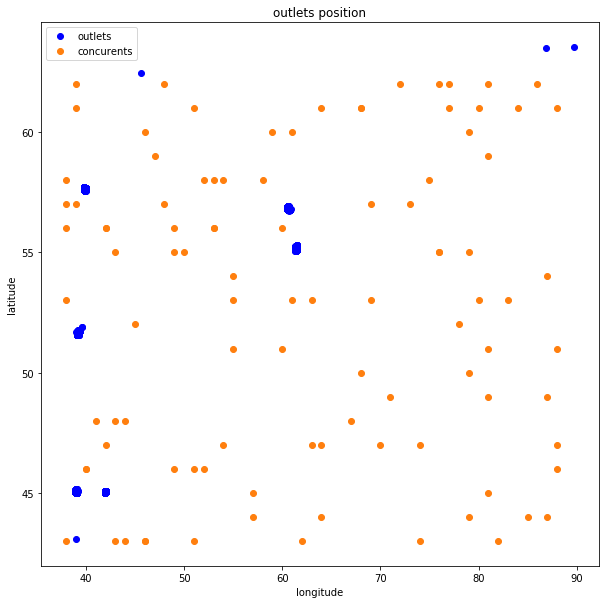

In [148]:

# отображаем торговые точки и точки конкурентов на одном холсте
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(coordinate['long'], coordinate['lat'], 'bo', label="outlets")
ax.plot(c[0], c[1], 'bo', color='tab:orange', label="concurents")
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.set_title('outlets position')
plt.legend(loc='upper left');
plt.show()

In [149]:
# поиск конкурентов в заданном радиусе для каждой торговой точки
point_radius = 0.9 # окрестность торговой точки

radius_point_acceses = power(point_radius,2)
lenght_our_points = len(coordinate['lat'])
array_points_concurrent_and_friendly = []

for i in range(1, lenght_our_points ):
    list_concurent = {}
       
    for j in range(1, len(c[0])):
        radius = power((c[0][j] - coordinate['long'][i]),2) + power(( c[1][j] - coordinate['lat'][i]),2)
        if radius <= radius_point_acceses:
            list_concurent.update({'x':c[0][j], 'y':c[1][j]})

    array_points_concurrent_and_friendly.append({'point':{'x':coordinate['long'][i], 'y': coordinate['lat'][i]}, 'concerrency': list_concurent})


# функиция, которая возвращает список торговых точек и конкурентов в окрестности точки x, y радиусом r
def get_list_points_of_area(x, y, r, array):

    radius_point_acceses = power(r,2)
    list_points_of_area = []
    
    for i in range(1,len(array)):
        radius = power((array[i]['point']['x'] - x),2) + power((array[i]['point']['y'] - y),2)
        
        if radius <= radius_point_acceses:
            list_points_of_area.append(array[i])
    return list_points_of_area

result = get_list_points_of_area(40, 45, 5, array_points_concurrent_and_friendly)

print(result)



[{'point': {'x': 41.952760999999995, 'y': 45.021525}, 'concerrency': {}}, {'point': {'x': 41.985436, 'y': 45.050979}, 'concerrency': {}}, {'point': {'x': 41.978952, 'y': 45.029446}, 'concerrency': {}}, {'point': {'x': 39.093757000000004, 'y': 45.022896}, 'concerrency': {}}, {'point': {'x': 41.985792, 'y': 45.050270000000005}, 'concerrency': {}}, {'point': {'x': 41.916134, 'y': 45.006809999999994}, 'concerrency': {}}, {'point': {'x': 39.0458, 'y': 45.0247}, 'concerrency': {}}, {'point': {'x': 41.936693, 'y': 45.026672999999995}, 'concerrency': {}}, {'point': {'x': 39.013000000000005, 'y': 45.104594}, 'concerrency': {}}, {'point': {'x': 39.019183, 'y': 45.021105}, 'concerrency': {}}, {'point': {'x': 38.914004, 'y': 45.068014}, 'concerrency': {}}, {'point': {'x': 38.937127000000004, 'y': 45.046336}, 'concerrency': {}}, {'point': {'x': 38.91325, 'y': 45.038852}, 'concerrency': {}}, {'point': {'x': 39.002731, 'y': 45.087156}, 'concerrency': {}}, {'point': {'x': 39.028036, 'y': 45.046456}, '